In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados

In [ ]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
cups = pd.read_csv('WorldCups.csv')

matches['Home Team Goals'] = pd.to_numeric(matches['Home Team Goals'], errors='coerce')
matches['Away Team Goals'] = pd.to_numeric(matches['Away Team Goals'], errors='coerce')
matches['total_goals'] = matches['Home Team Goals'] + matches['Away Team Goals']

# 1. Aproveitamento por seleção (vitórias / jogos)

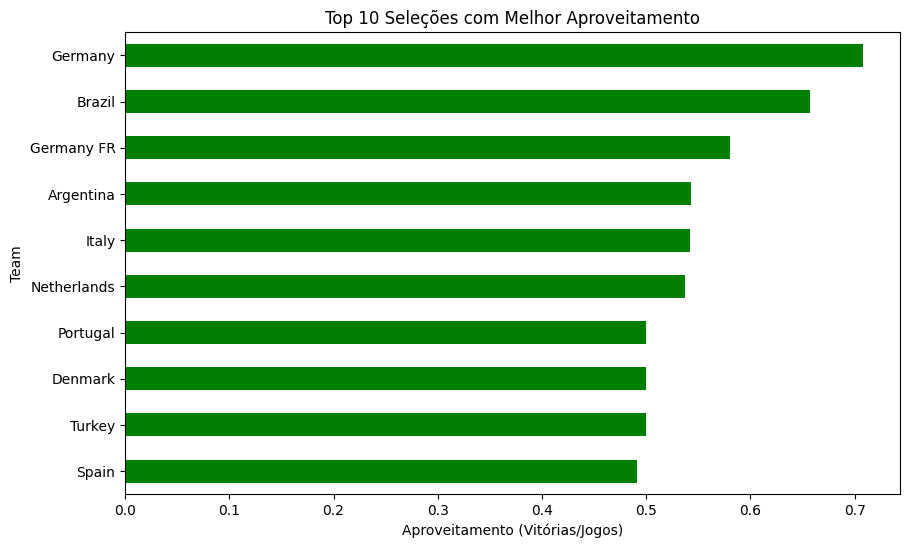

In [ ]:
def plot_win_ratio():
    home = matches[['Home Team Name', 'Home Team Goals', 'Away Team Goals']].copy()
    home.columns = ['Team', 'Goals For', 'Goals Against']
    home['Win'] = home['Goals For'] > home['Goals Against']

    away = matches[['Away Team Name', 'Away Team Goals', 'Home Team Goals']].copy()
    away.columns = ['Team', 'Goals For', 'Goals Against']
    away['Win'] = away['Goals For'] > away['Goals Against']

    all_teams = pd.concat([home, away])
    win_ratio = all_teams.groupby('Team').agg({'Win': 'sum', 'Goals For': 'count'})
    win_ratio['Win Ratio'] = win_ratio['Win'] / win_ratio['Goals For']
    top_win_ratio = win_ratio.sort_values('Win Ratio', ascending=False)['Win Ratio'].head(10)
    
    top_win_ratio.plot(kind='barh', title='Top 10 Seleções com Melhor Aproveitamento', figsize=(10, 6), color='green')
    plt.xlabel('Aproveitamento (Vitórias/Jogos)')
    plt.gca().invert_yaxis()
    plt.show()
    
plot_win_ratio()

# 2. Média de público por edição

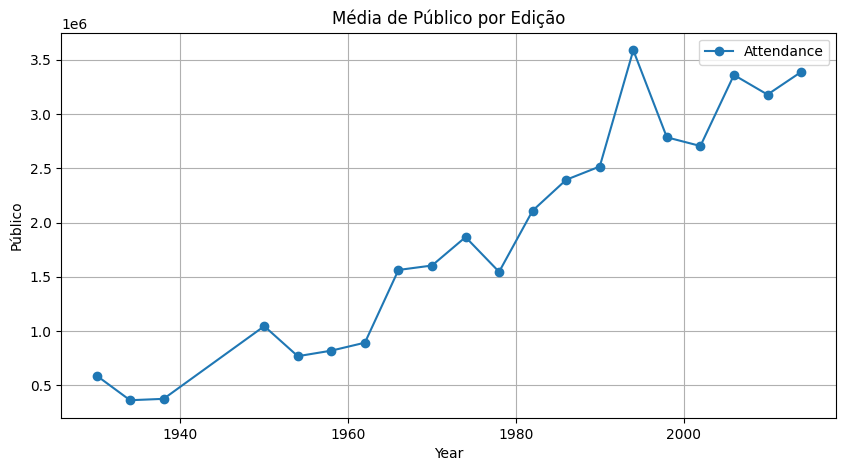

In [20]:
def plot_avg_attendance():
    cups['Attendance'] = cups['Attendance'].replace(r'\.', '', regex=True).astype(float)

    cups[['Year', 'Attendance']].set_index('Year').plot(
        kind='line', marker='o', title='Média de Público por Edição', figsize=(10, 5)
    )
    plt.ylabel('Público')
    plt.grid(True)
    plt.show()

plot_avg_attendance()

# 3. Seleções com mais participações sem título

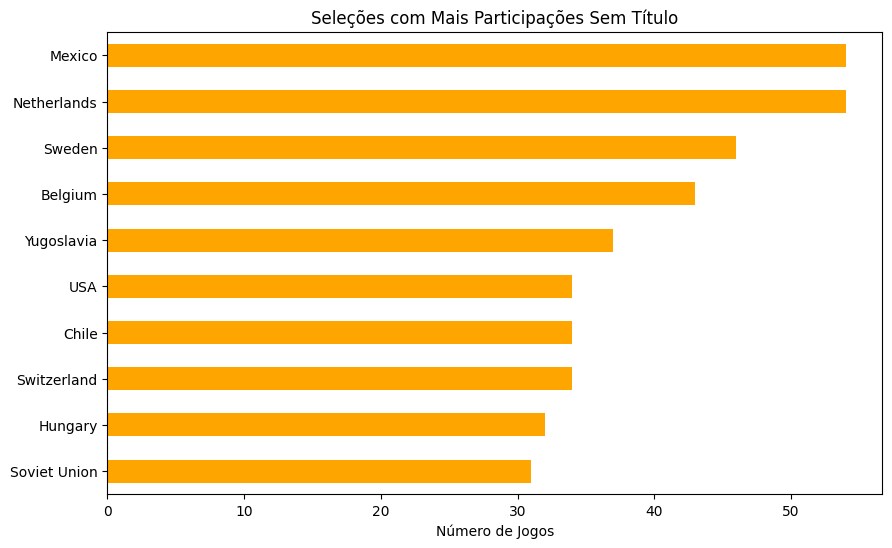

In [ ]:
def plot_teams_without_titles():
    titles = cups['Winner'].value_counts()
    appearances = matches['Home Team Name'].value_counts() + matches['Away Team Name'].value_counts()
    no_title = appearances[~appearances.index.isin(titles.index)].sort_values(ascending=False).head(10)
    no_title.plot(kind='barh', title='Seleções com Mais Participações Sem Título', color='orange', figsize=(10, 6))
    plt.xlabel('Número de Jogos')
    plt.gca().invert_yaxis()
    plt.show()

plot_teams_without_titles()

# 4. Aproveitamento dos anfitriões

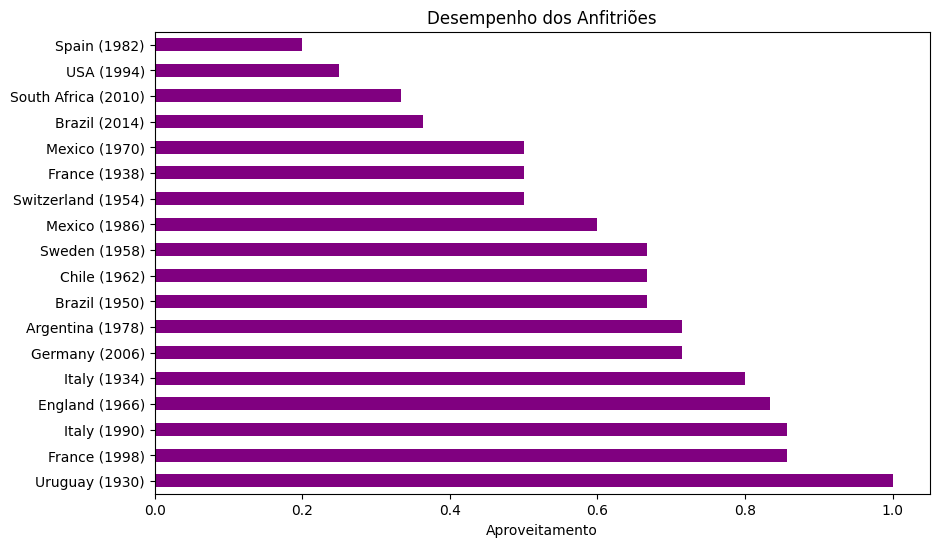

In [ ]:
def plot_host_performance():
    host_perf = {}
    for _, row in cups.iterrows():
        year, host = row['Year'], row['Country']
        host_matches = matches[(matches['Year'] == year) & 
                               ((matches['Home Team Name'] == host) | (matches['Away Team Name'] == host))]
        wins = 0
        for _, m in host_matches.iterrows():
            if m['Home Team Name'] == host and m['Home Team Goals'] > m['Away Team Goals']:
                wins += 1
            elif m['Away Team Name'] == host and m['Away Team Goals'] > m['Home Team Goals']:
                wins += 1
        if len(host_matches) > 0:
            host_perf[f"{host} ({year})"] = wins / len(host_matches)
    pd.Series(host_perf).sort_values().plot(kind='barh', title='Desempenho dos Anfitriões', color='purple', figsize=(10, 6))
    plt.xlabel('Aproveitamento')
    plt.gca().invert_yaxis()
    plt.show()

plot_host_performance()

# 5. Média de gols por jogo por edição

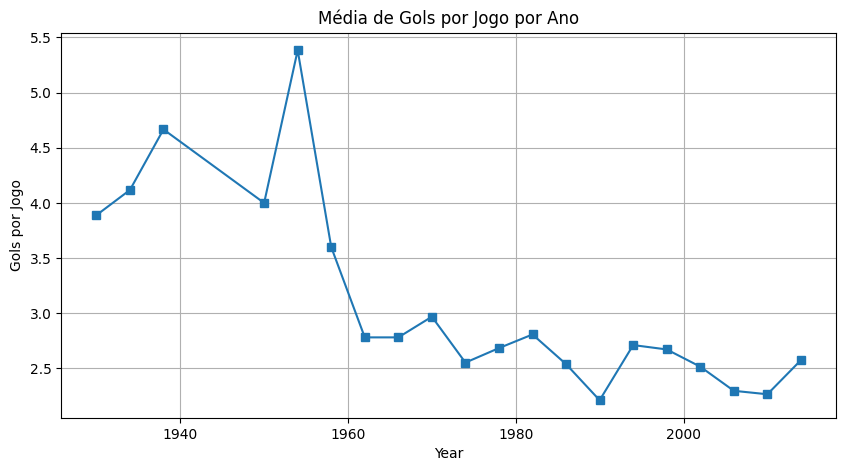

In [ ]:
def plot_avg_goals():
    avg_goals = matches.groupby('Year')['total_goals'].mean()
    avg_goals.plot(marker='s', title='Média de Gols por Jogo por Ano', figsize=(10, 5))
    plt.ylabel('Gols por Jogo')
    plt.grid(True)
    plt.show()

plot_avg_goals()

# 6. Jogadores com mais partidas

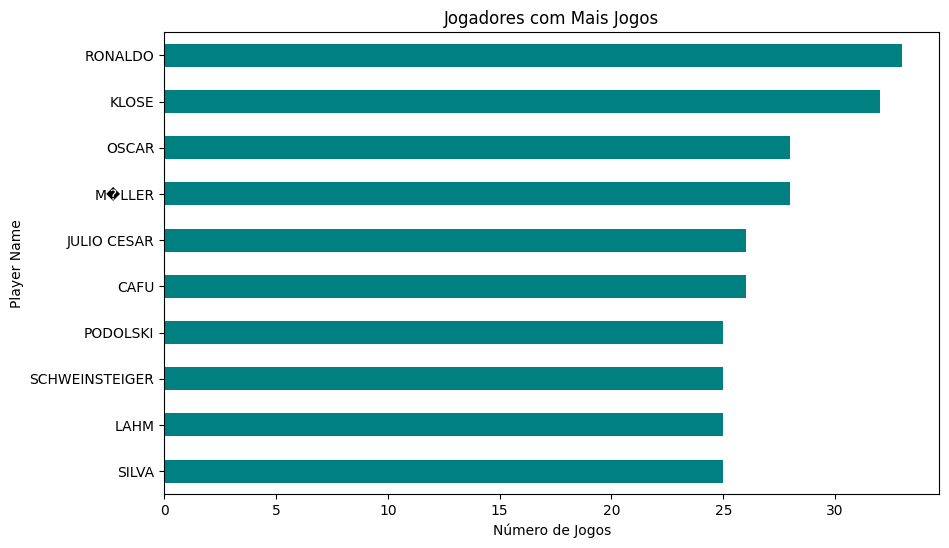

In [ ]:
def plot_top_players():
    top_players = players['Player Name'].value_counts().head(10)
    top_players.plot(kind='barh', title='Jogadores com Mais Jogos', color='teal', figsize=(10, 6))
    plt.xlabel('Número de Jogos')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_players()

# 7. Seleções com mais gols marcados

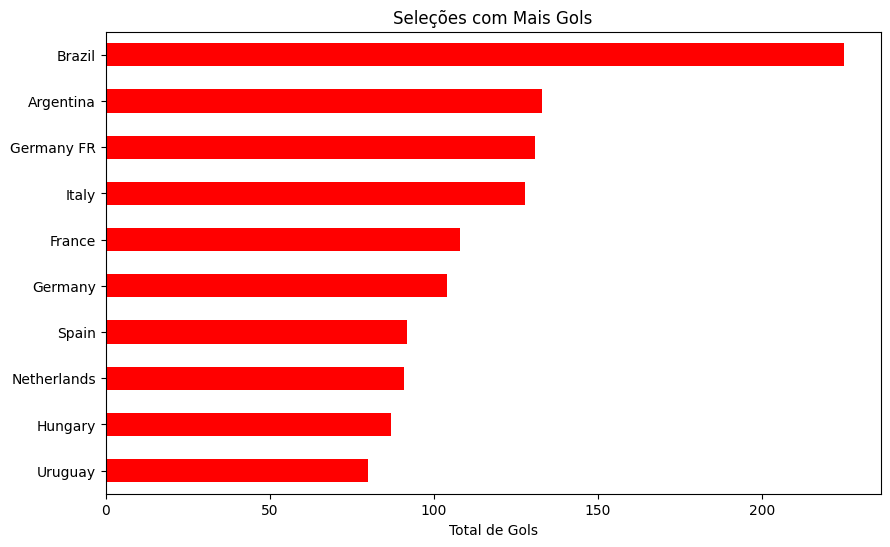

In [ ]:
def plot_top_goal_teams():
    home_goals = matches.groupby('Home Team Name')['Home Team Goals'].sum()
    away_goals = matches.groupby('Away Team Name')['Away Team Goals'].sum()
    total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False).head(10)
    total_goals.plot(kind='barh', title='Seleções com Mais Gols', color='red', figsize=(10, 6))
    plt.xlabel('Total de Gols')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_goal_teams()

# 8. Porcentagem de vezes que o país-sede venceu

In [ ]:
def print_host_win_percentage():
    total = len(cups)
    wins = (cups['Country'] == cups['Winner']).sum()
    print(f'Porcentagem de vezes que o país-sede venceu: {(wins / total) * 100:.2f}%')

print_host_win_percentage()

Porcentagem de vezes que o país-sede venceu: 25.00%


# 9. Seleções com mais eliminações em fases finais

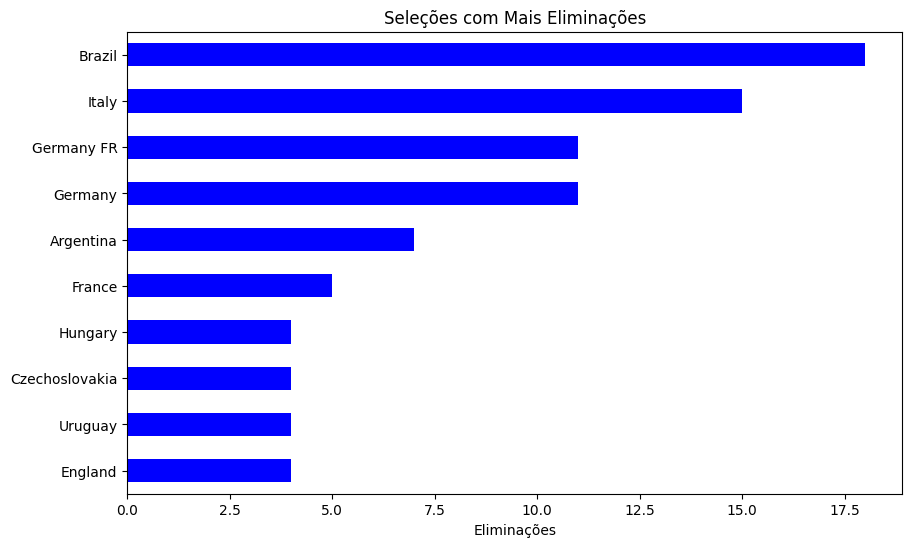

In [ ]:
def plot_knockout_eliminations():
    knockout_rounds = ['Quarter-finals', 'Semi-finals', 'Final', 'Third place']
    knockout_matches = matches[matches['Stage'].isin(knockout_rounds)]
    winners = []
    for _, row in knockout_matches.iterrows():
        if row['Home Team Goals'] > row['Away Team Goals']:
            winners.append(row['Home Team Name'])
        elif row['Away Team Goals'] > row['Home Team Goals']:
            winners.append(row['Away Team Name'])
    pd.Series(winners).value_counts().head(10).plot(kind='barh', title='Seleções com Mais Eliminações', color='blue', figsize=(10, 6))
    plt.xlabel('Eliminações')
    plt.gca().invert_yaxis()
    plt.show()

plot_knockout_eliminations()

# 10. Seleções com mais empates

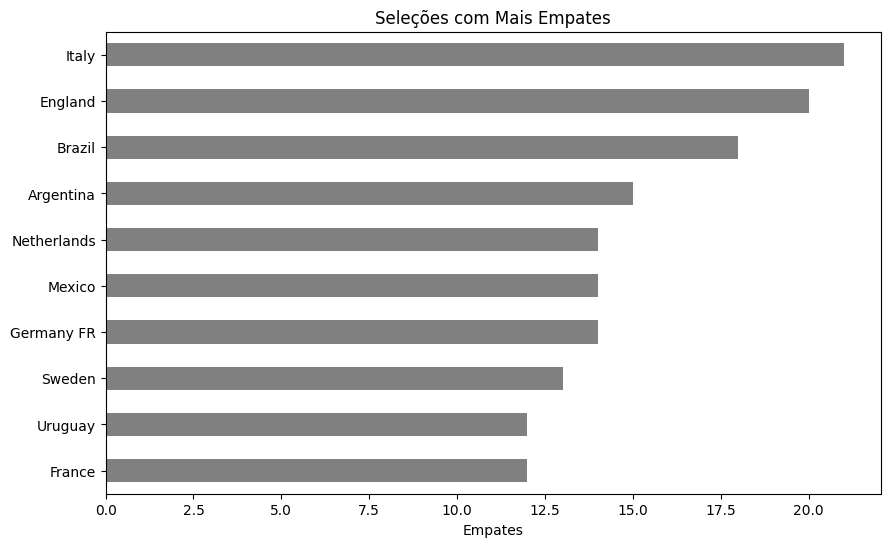

In [ ]:
def plot_most_draws():
    draws = matches[matches['Home Team Goals'] == matches['Away Team Goals']]
    draw_teams = pd.concat([draws['Home Team Name'], draws['Away Team Name']])
    draw_teams.value_counts().head(10).plot(kind='barh', title='Seleções com Mais Empates', color='gray', figsize=(10, 6))
    plt.xlabel('Empates')
    plt.gca().invert_yaxis()
    plt.show()

plot_most_draws()